In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Cred_Consumpt=pd.read_excel(r"D:\DATA SCIENCE\Machine Learning\Machine Learning Case Study\11. Capstone Case Study - Predict Cred Card Consumption\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx")

In [3]:
Cred_Consumpt.head()

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0
2,7433,21182.0
3,14606,8123.0
4,8381,28282.0


In [4]:
Cust_Beh=pd.read_excel(r"D:\DATA SCIENCE\Machine Learning\Machine Learning Case Study\11. Capstone Case Study - Predict Cred Card Consumption\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx")

In [5]:
Cust_Beh.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90
3,14606,3126.00,4616.33,8676.80,5923.00,6717.000,18747.00,4.0,30,1,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61
4,8381,24988.72,10091.23,10132.00,3477.00,4667.000,511.00,2.0,8,5,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89


In [6]:
Cust_Demographic=pd.read_excel(r"D:\DATA SCIENCE\Machine Learning\Machine Learning Case Study\11. Capstone Case Study - Predict Cred Card Consumption\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx")

In [7]:
Cust_Demographic.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0
3,14606,current,M,63,LOW,10.2,6,6,863,0
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0


In [8]:
Cust_merge=pd.merge(left=Cust_Demographic,right=Cust_Beh,how='inner',on='ID')

In [9]:
Cust_merge.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90
3,14606,current,M,63,LOW,10.2,6,6,863,0,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89


In [10]:
final_df=pd.merge(left=Cust_merge,right=Cred_Consumpt,how='inner',on='ID')

## 1. Corelation Check

In [12]:
final_df

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84,16239.0
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69,39002.0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0,...,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90,21182.0
3,14606,current,M,63,LOW,10.2,6,6,863,0,...,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61,8123.0
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0,...,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89,28282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,current,M,35,MEDIUM,13.5,1,1,523,0,...,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN
19996,14224,current,M,53,MEDIUM,9.9,7,7,723,1,...,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN
19997,18740,current,M,62,HIGH,37.8,8,8,863,1,...,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN
19998,18134,current,M,34,MEDIUM,12.6,4,4,882,0,...,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN


In [13]:
num_df=final_df.select_dtypes('number')

In [14]:
corr_df=num_df.corr()

In [15]:
corr_df

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,-0.002185,0.006340,0.003843,0.003843,0.007011,0.013448,0.001836,-0.000093,-0.017808,...,0.024034,0.009074,-0.011449,-0.007718,-0.005036,0.009057,-0.002447,-0.014021,0.004497,-0.010018
age,-0.002185,1.000000,0.200912,-0.001742,-0.001742,0.010439,0.003992,-0.001099,-0.000937,0.005353,...,-0.001620,0.004250,-0.003397,0.021090,0.005584,0.012914,0.001399,-0.004956,0.001249,-0.007125
Emp_Tenure_Years,0.006340,0.200912,1.000000,-0.003315,-0.003315,0.006272,0.006349,0.007394,0.009928,-0.001826,...,-0.003757,0.021439,-0.007015,0.008282,-0.003133,-0.000088,-0.000665,0.002695,-0.010140,-0.004999
Tenure_with_Bank,0.003843,-0.001742,-0.003315,1.000000,1.000000,-0.000800,-0.007443,-0.003205,-0.010776,0.008917,...,0.001093,0.010778,0.011332,-0.004240,0.002563,-0.006382,-0.003010,-0.010462,0.007820,-0.007445
region_code,0.003843,-0.001742,-0.003315,1.000000,1.000000,-0.000800,-0.007443,-0.003205,-0.010776,0.008917,...,0.001093,0.010778,0.011332,-0.004240,0.002563,-0.006382,-0.003010,-0.010462,0.007820,-0.007445
NetBanking_Flag,0.007011,0.010439,0.006272,-0.000800,-0.000800,1.000000,0.005854,0.002396,-0.005654,-0.004207,...,-0.003880,-0.001299,-0.010399,0.016238,0.003008,0.010303,0.012548,0.000893,0.006728,-0.006213
Avg_days_between_transaction,0.013448,0.003992,0.006349,-0.007443,-0.007443,0.005854,1.000000,0.007283,0.000745,0.006159,...,0.001722,-0.005062,0.006906,-0.003644,0.007982,0.006402,-0.001983,-0.000343,0.007036,0.000067
cc_cons_apr,0.001836,-0.001099,0.007394,-0.003205,-0.003205,0.002396,0.007283,1.000000,-0.004596,0.010823,...,-0.001036,0.005630,0.007314,-0.000875,-0.004569,-0.004345,0.006793,0.006245,-0.003773,0.499045
dc_cons_apr,-0.000093,-0.000937,0.009928,-0.010776,-0.010776,-0.005654,0.000745,-0.004596,1.000000,0.004035,...,0.003257,0.004767,0.006419,-0.002146,-0.001275,-0.002405,-0.004368,-0.018256,-0.010986,0.287075
cc_cons_may,-0.017808,0.005353,-0.001826,0.008917,0.008917,-0.004207,0.006159,0.010823,0.004035,1.000000,...,-0.006607,0.004892,0.005079,-0.005457,0.004847,0.001704,-0.012498,0.031306,0.005986,0.524564


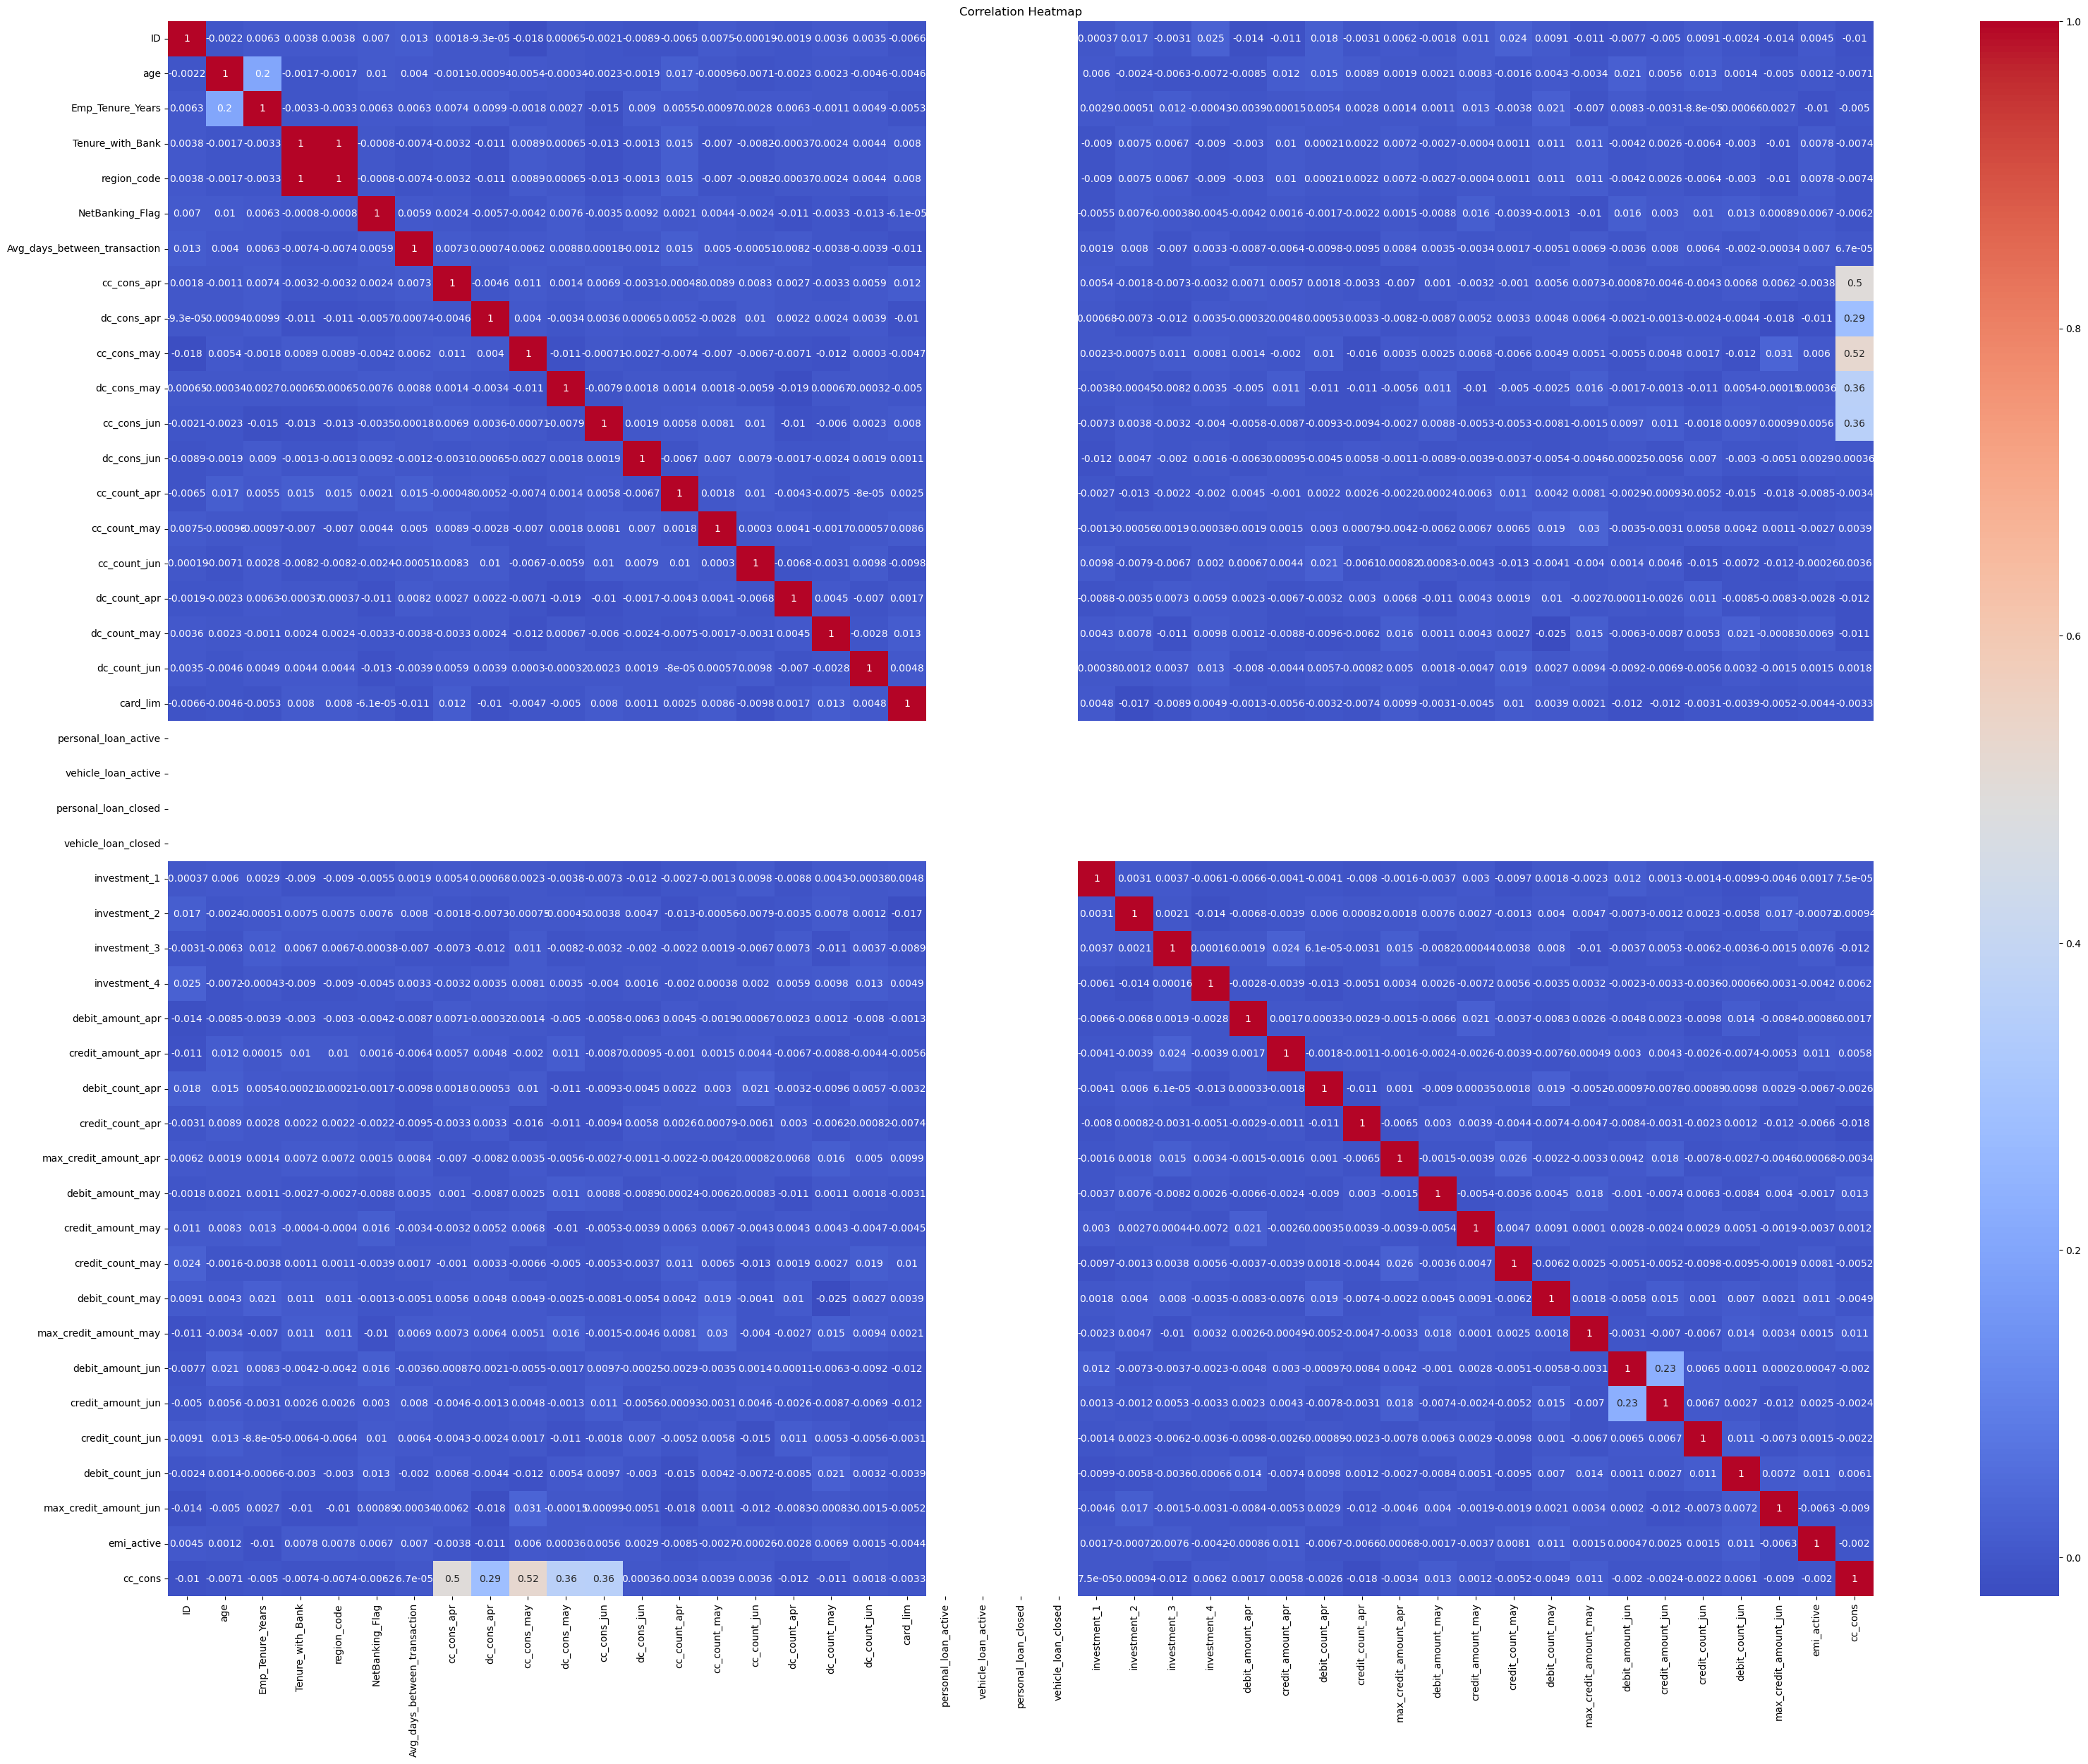

In [16]:
plt.figure(figsize=(39, 29))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')  # Optional: set cmap for color aesthetics
plt.title("Correlation Heatmap")
plt.show()

## 2. Handling Null value

In [18]:
final_df.isna().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        1
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

In [19]:
med_col=['cc_cons_may','dc_cons_may','dc_cons_jun','cc_count_apr','personal_loan_closed','investment_3','debit_count_apr','emi_active']                           

In [20]:
for i in med_col:
    final_df[i].fillna(final_df[i].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_21580\3702468737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[i].fillna(final_df[i].median(), inplace=True)


In [21]:
final_df.isna().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

In [22]:
final_df.loan_enq.fillna(final_df.loan_enq.mode().iloc[0],inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_21580\1560513301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df.loan_enq.fillna(final_df.loan_enq.mode().iloc[0],inplace=True)


In [23]:
final_df.isna().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

## 3. Converting Categorical Value into Numerical Value

In [25]:
final_df.select_dtypes('object')

,account_type,gender,Income,loan_enq
0,current,M,MEDIUM,Y
1,current,M,LOW,Y
2,current,M,MEDIUM,Y
3,current,M,LOW,Y
4,saving,M,MEDIUM,Y
...,...,...,...,...
19995,current,M,MEDIUM,Y
19996,current,M,MEDIUM,Y
19997,current,M,HIGH,Y
19998,current,M,MEDIUM,Y


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in ['account_type','gender','Income','loan_enq']:
    le=LabelEncoder()
    final_df[col]=le.fit_transform(final_df[col].astype(str))

In [28]:
final_df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,1,2,30,3,26.4,9,9,355,0,...,20,41860.0,32734.75,80959.00,36,9,171200.0,0,3448.84,16239.0
1,11491,1,2,37,2,14.4,7,7,485,0,...,8,113367.0,60974.75,495080.00,5,3,15694.0,0,3812.69,39002.0
2,7433,1,2,33,3,3.2,1,1,764,0,...,14,168000.0,425802.96,115707.38,7,58,28058.0,0,9432.90,21182.0
3,14606,1,2,63,2,10.2,6,6,863,0,...,44,57750.0,25537.91,63606.00,12,0,24459.0,0,144.61,8123.0
4,8381,2,2,33,3,26.4,6,6,523,0,...,2,18405.0,64687.32,62353.35,49,35,31574.0,0,1887.89,28282.0


### Handling Outlier

<Axes: ylabel='cc_cons'>

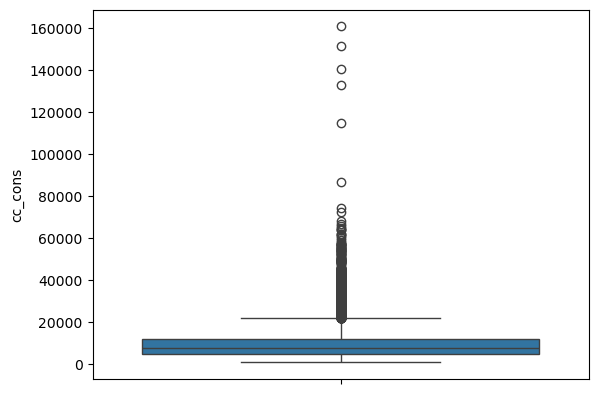

In [30]:
sns.boxplot(final_df['cc_cons'])

#### We don't handle outlier in the target column as if do loss high spender and we have to predict value for missing cust

In [32]:
final_df.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

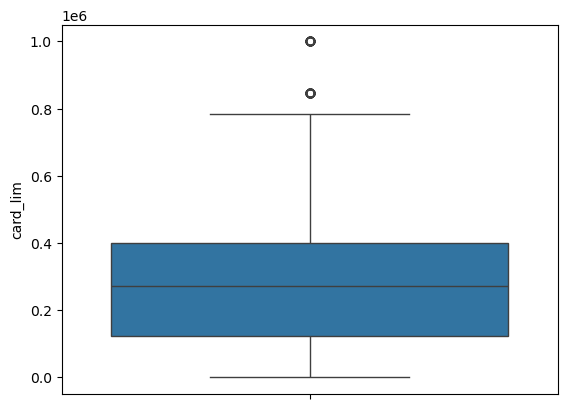

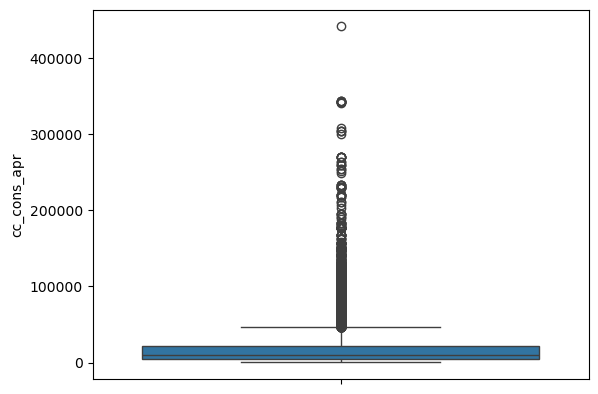

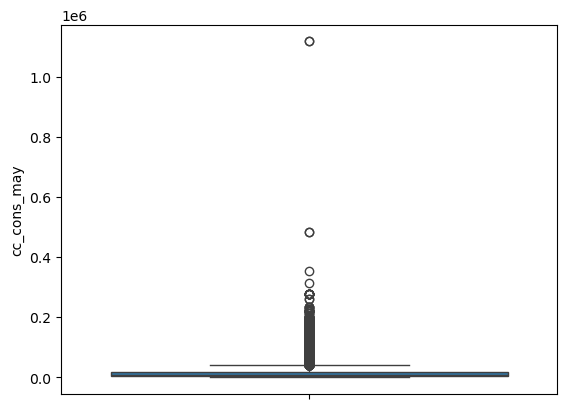

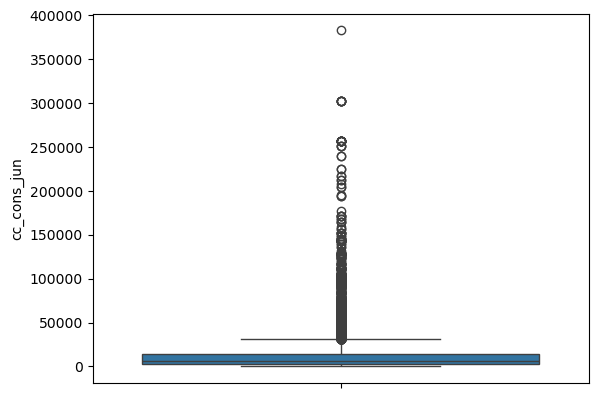

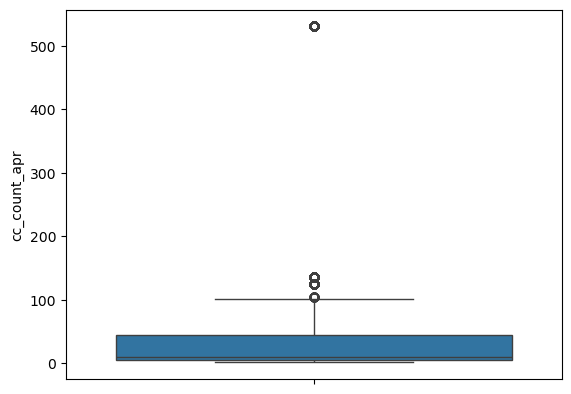

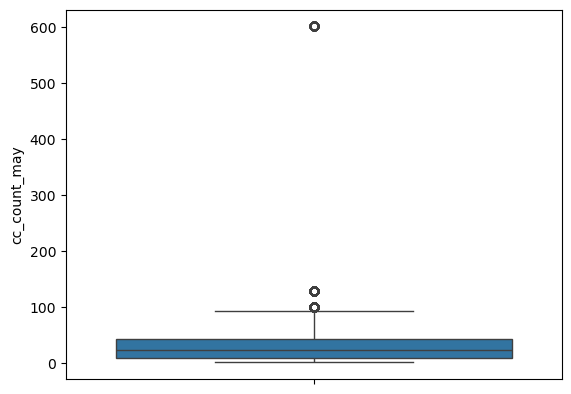

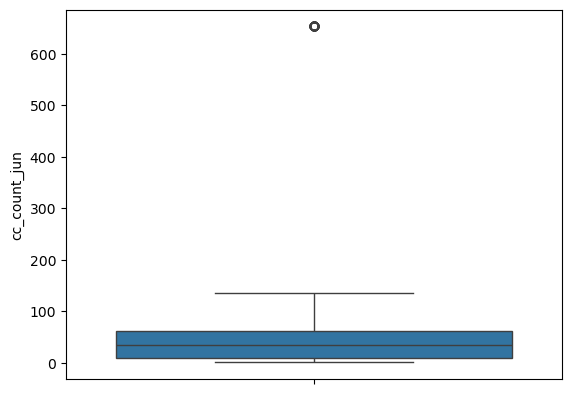

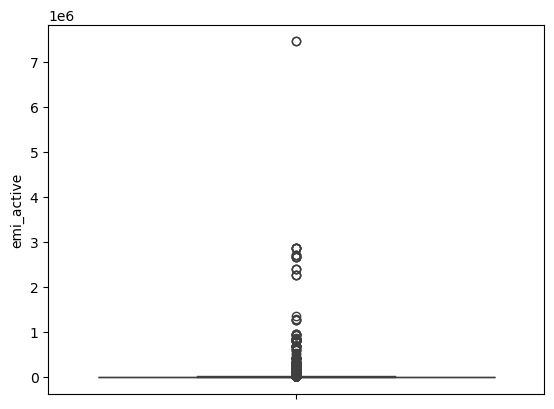

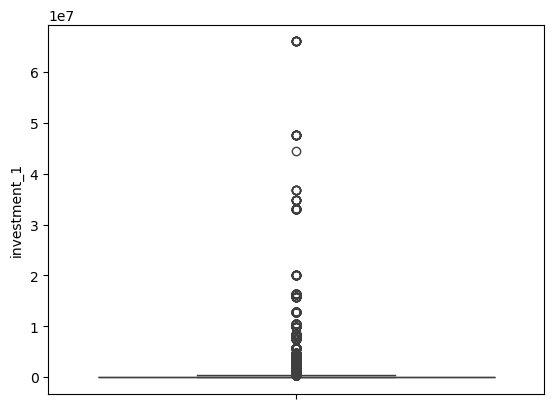

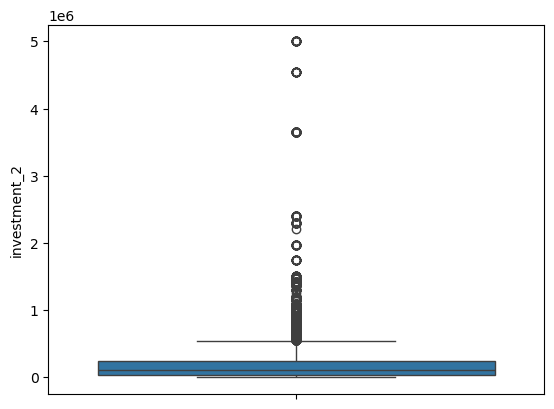

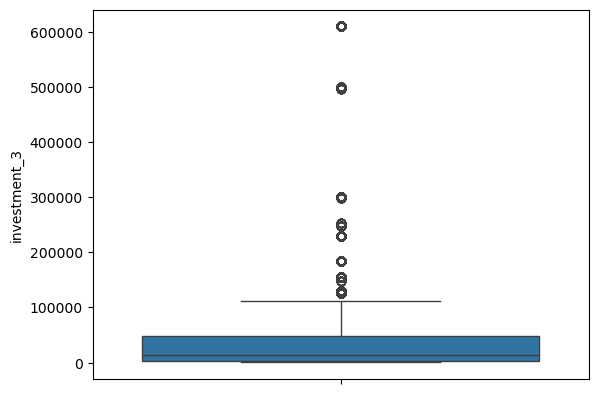

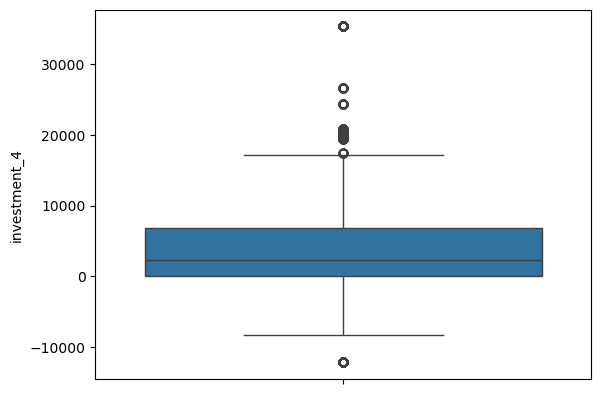

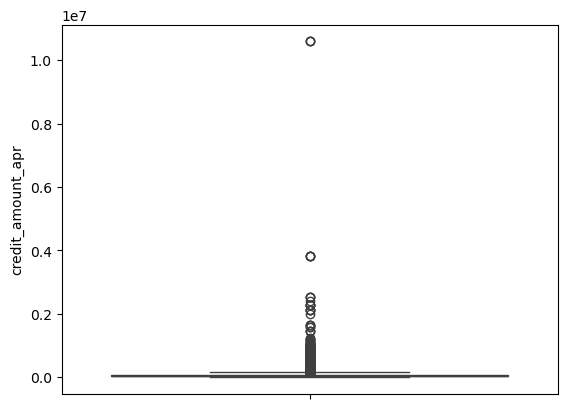

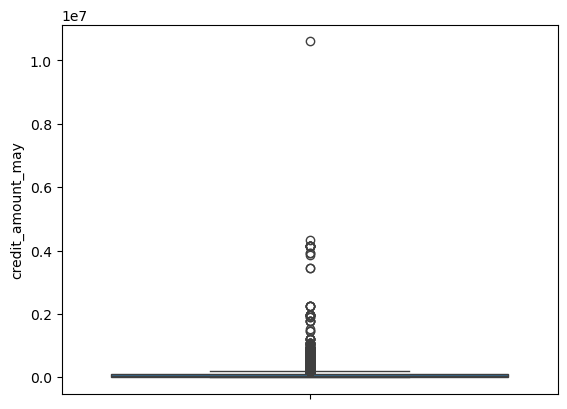

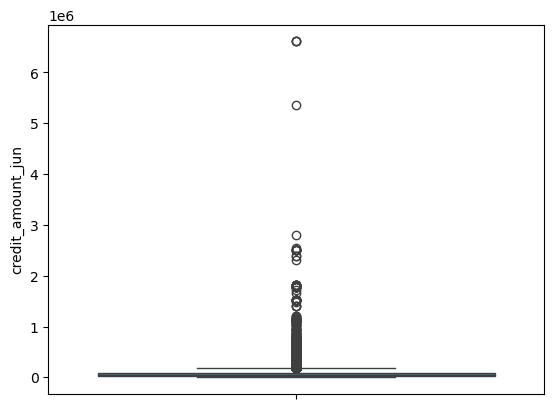

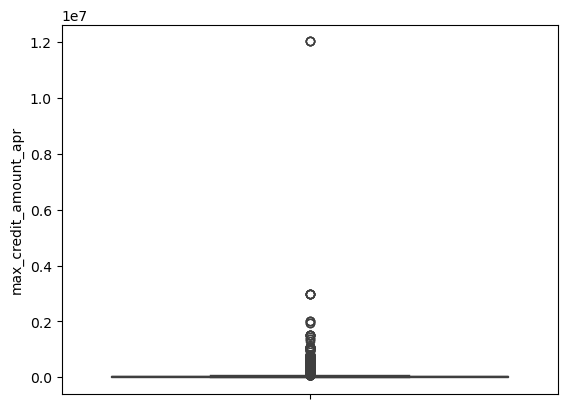

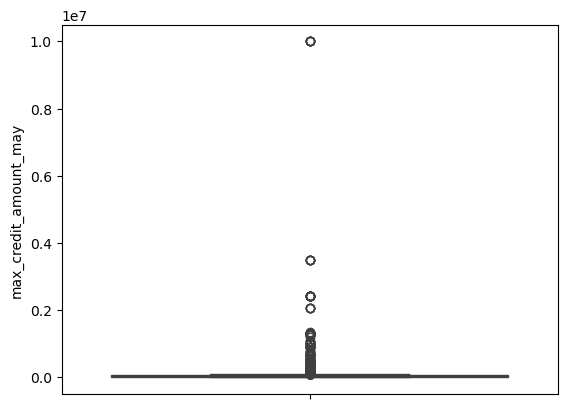

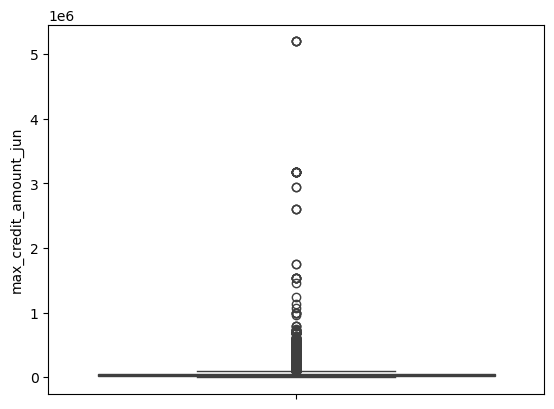

In [33]:
for col in ['card_lim','cc_cons_apr', 'cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun', 'emi_active', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'credit_amount_apr','credit_amount_may','credit_amount_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']:
    sns.boxplot(final_df[col])
    plt.show()

In [34]:
def iq_func(dff,col):
    q1=dff[col].quantile(0.25)
    q3=dff[col].quantile(0.75)
    iqr=q3-q1
    min_wis=q1-1.5*iqr
    max_wis=q3+1.5*iqr
    return(min_wis,max_wis)

In [35]:
for col in ['card_lim','cc_cons_apr', 'cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun', 'emi_active', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'credit_amount_apr','credit_amount_may','credit_amount_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']:
    ll,ul=iq_func(final_df,col)
    total_data=final_df.shape[0]
    selected_record=final_df[(final_df[col]<=ll) | (final_df[col]>=ul)].shape[0]
    record_percentage=selected_record/total_data
    print(col)
    print(ll,ul)
    print(record_percentage)
    print(selected_record)
    print('----------------------------------------')

card_lim
-291500.0 816500.0
0.00435
87
----------------------------------------
cc_cons_apr
-20841.0 46407.0
0.08155
1631
----------------------------------------
cc_cons_may
-18880.20375 41162.76625
0.0807
1614
----------------------------------------
cc_cons_jun
-13795.903750000001 30990.706250000003
0.0795
1590
----------------------------------------
cc_count_apr
-53.5 102.5
0.05905
1181
----------------------------------------
cc_count_may
-44.5 95.5
0.0473
946
----------------------------------------
cc_count_jun
-66.5 137.5
0.00315
63
----------------------------------------
emi_active
-10199.734999999999 21122.065
0.09205
1841
----------------------------------------
investment_1
-227479.37500000003 395214.025
0.13925
2785
----------------------------------------
investment_2
-270180.0 554108.0
0.0855
1710
----------------------------------------
investment_3
-67890.0 119054.0
0.10365
2073
----------------------------------------
investment_4
-10327.5 17212.5
0.0662
1324
------

In [36]:
def cap_outliers(df, col):
    ll, ul = iq_func(df, col)
    df[col] = df[col].clip(lower=ll, upper=ul)

In [37]:
cols_to_cap = ['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun',
               'cc_count_apr', 'cc_count_may',
               'emi_active', 'investment_1', 'investment_2', 'investment_3', 'investment_4',
               'credit_amount_apr', 'credit_amount_may', 'credit_amount_jun',
               'max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']
for col in cols_to_cap:
    cap_outliers(final_df,col)

In [38]:
def count_outliers(df, col):
    ll, ul = iq_func(df, col)  # Recalculate based on updated data
    return df[(df[col] < ll) | (df[col] > ul)].shape[0]


In [39]:
cols = ['card_lim','cc_cons_apr', 'cc_cons_may','cc_cons_jun',
        'cc_count_apr','cc_count_may','cc_count_jun',
        'emi_active', 'investment_1', 'investment_2', 'investment_3', 'investment_4',
        'credit_amount_apr','credit_amount_may','credit_amount_jun',
        'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']

for col in cols:
    # Step 1: Cap
    #cap_outliers(final_df, col)
    
    # Step 2: Check if any outliers remain
    remaining_outliers = count_outliers(final_df, col)
    
    print(f"{col}: {remaining_outliers} outliers remain after capping.")

card_lim: 87 outliers remain after capping.
cc_cons_apr: 0 outliers remain after capping.
cc_cons_may: 0 outliers remain after capping.
cc_cons_jun: 0 outliers remain after capping.
cc_count_apr: 0 outliers remain after capping.
cc_count_may: 0 outliers remain after capping.
cc_count_jun: 63 outliers remain after capping.
emi_active: 0 outliers remain after capping.
investment_1: 0 outliers remain after capping.
investment_2: 0 outliers remain after capping.
investment_3: 0 outliers remain after capping.
investment_4: 0 outliers remain after capping.
credit_amount_apr: 0 outliers remain after capping.
credit_amount_may: 0 outliers remain after capping.
credit_amount_jun: 0 outliers remain after capping.
max_credit_amount_apr: 0 outliers remain after capping.
max_credit_amount_may: 0 outliers remain after capping.
max_credit_amount_jun: 0 outliers remain after capping.


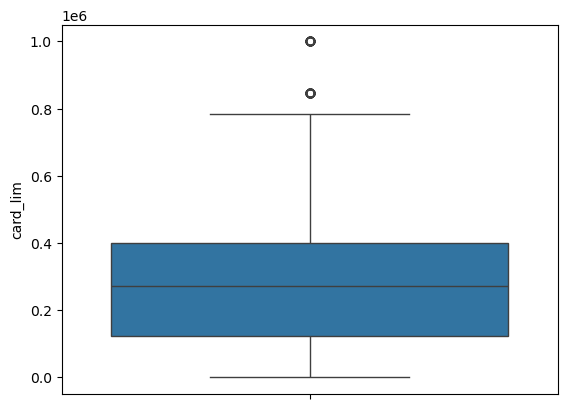

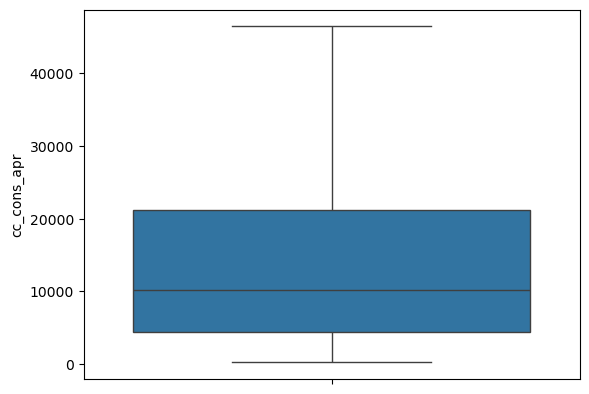

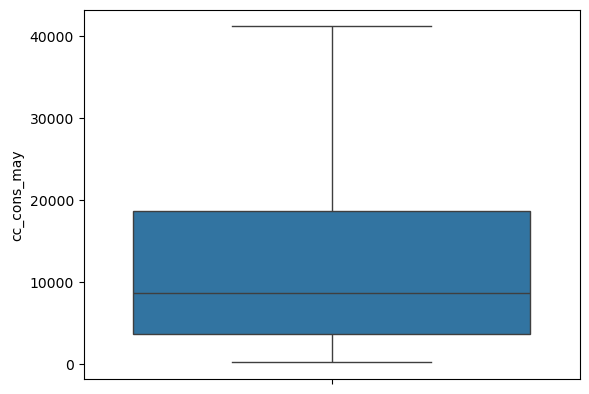

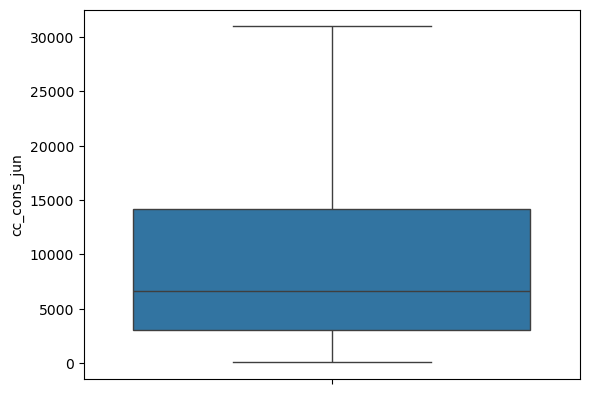

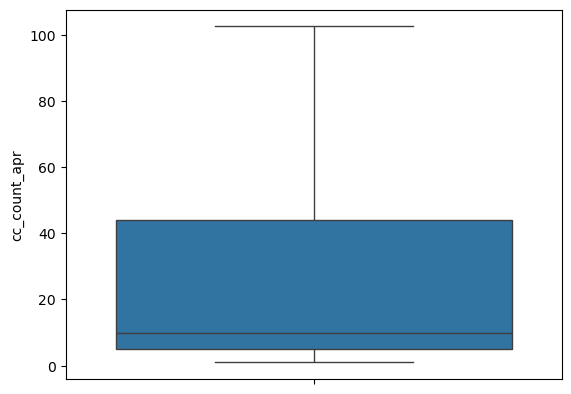

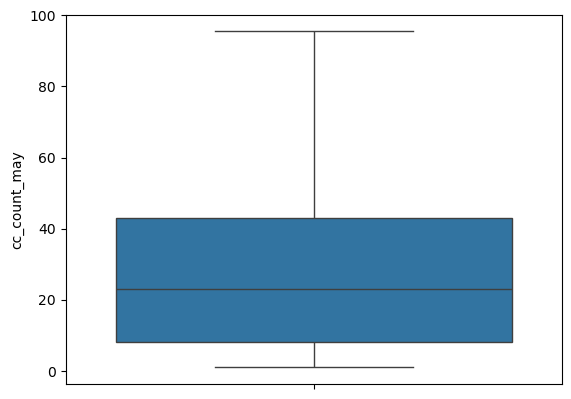

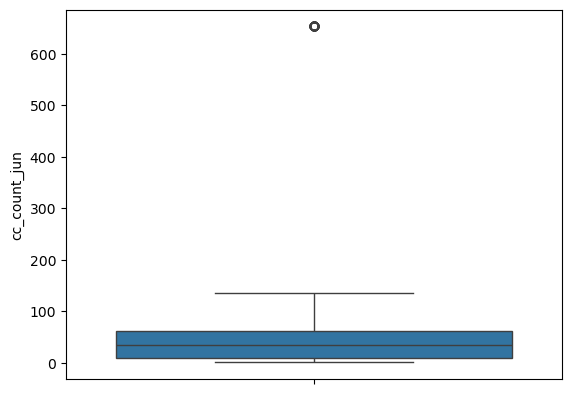

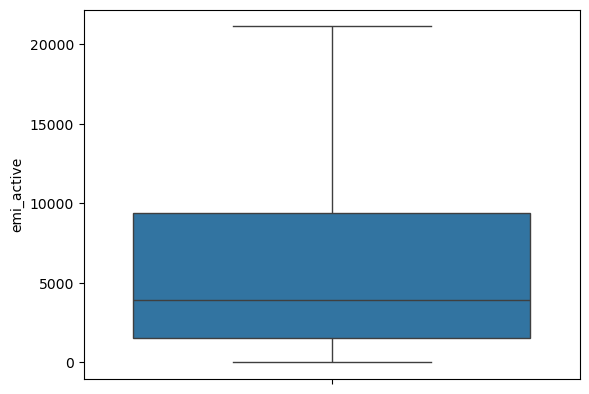

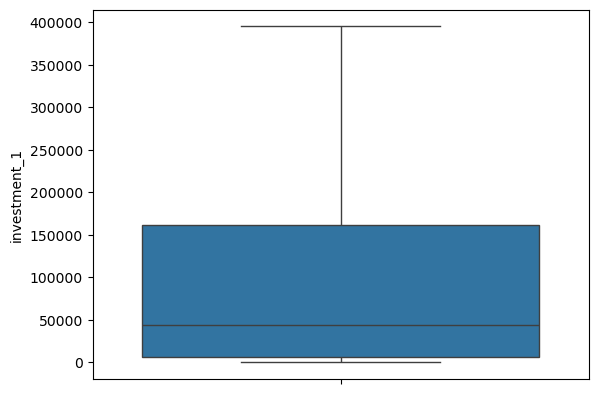

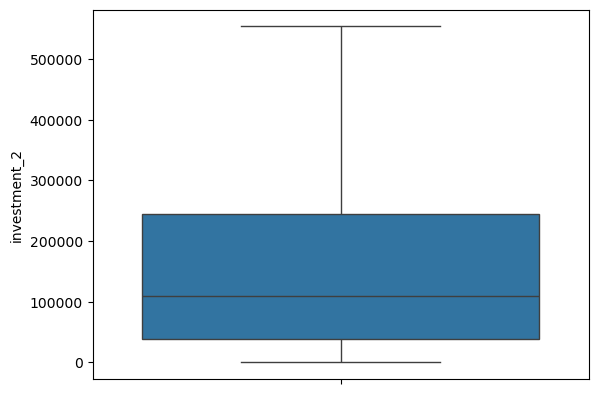

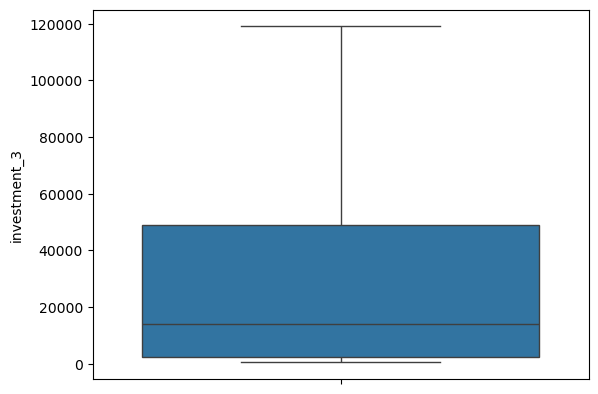

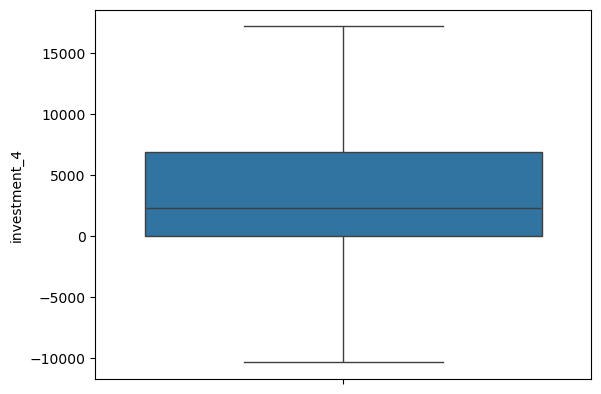

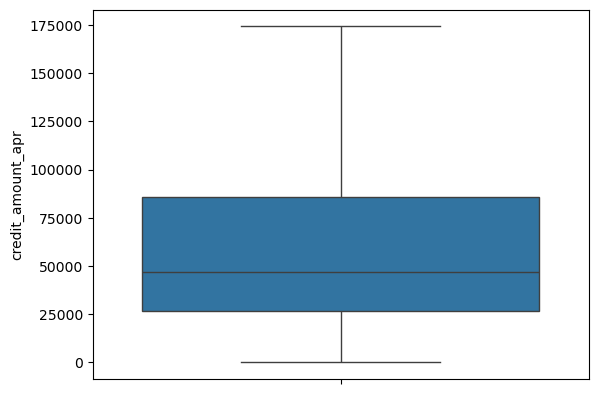

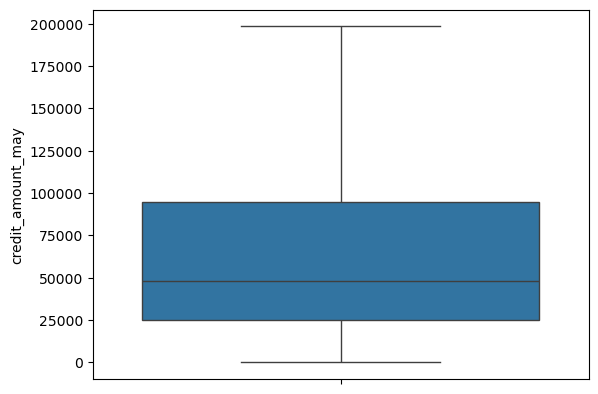

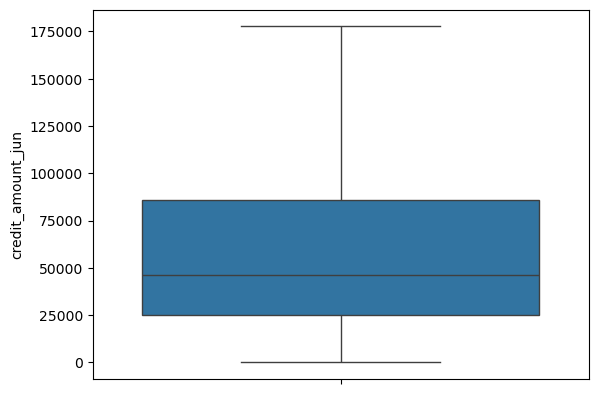

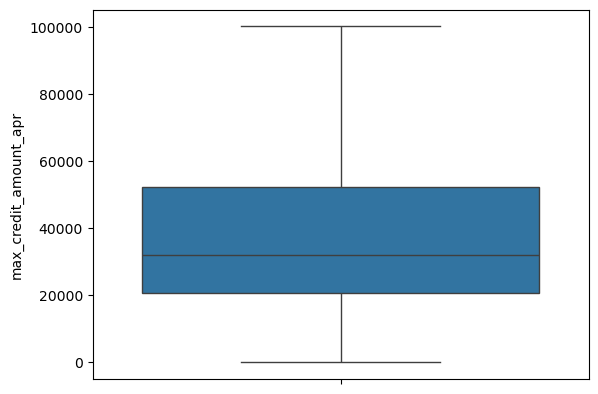

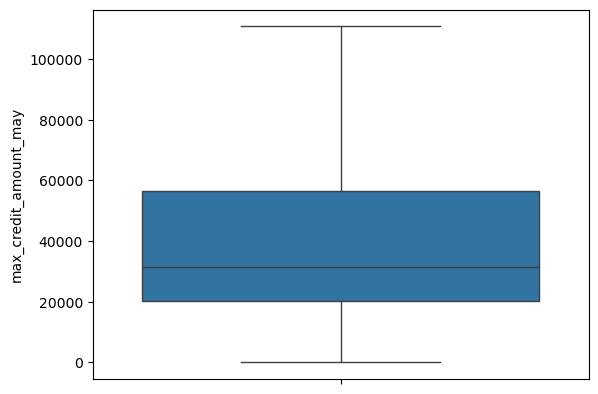

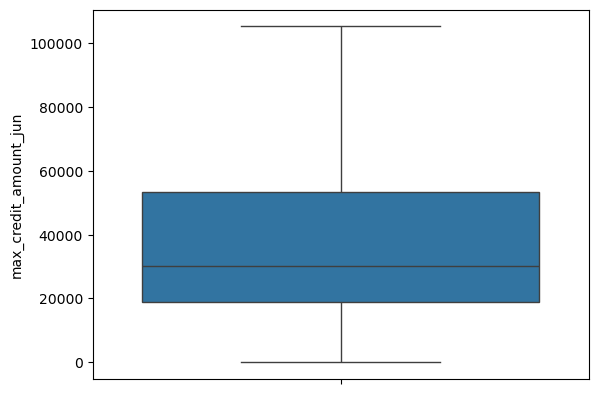

In [40]:
for col in ['card_lim','cc_cons_apr', 'cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun', 'emi_active', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'credit_amount_apr','credit_amount_may','credit_amount_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']:
    sns.boxplot(final_df[col])
    plt.show()

### Standardisation

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Step 1: Split the data
df_model = final_df[final_df['cc_cons'].notna()]
df_predict = final_df[final_df['cc_cons'].isna()]

In [44]:
# Step 2: Define X and y
X = df_model.iloc[:, :-1]
y = df_model['cc_cons']

In [45]:
ss=StandardScaler()
X_fit=ss.fit_transform(X)
X_fit=pd.DataFrame(X_fit,columns=X.columns)
X_fit.head(4)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,1.218525,-0.422607,0.398433,-0.580790,0.689028,0.552186,1.217858,1.217858,-1.106157,-1.601713,...,2.082578,-0.517981,-0.008918,-0.281058,0.362465,0.590222,-1.015959,2.202042,0.0,-0.465202
1,0.253277,-0.422607,0.398433,-0.352269,-0.879798,-0.038598,0.519945,0.519945,-0.515396,-1.601713,...,-0.707898,-0.814014,2.190986,-0.098282,2.259271,-0.549515,-1.186958,-0.813571,0.0,-0.409625
2,-0.451215,-0.422607,0.398433,-0.482852,0.689028,-0.589997,-1.573793,-1.573793,0.752469,-1.601713,...,-0.589155,-0.665997,2.190986,2.262973,1.043991,-0.475984,0.380534,-0.396893,0.0,0.448847
3,0.794059,-0.422607,0.398433,0.496524,-0.879798,-0.245373,0.170989,0.170989,1.202356,-1.601713,...,1.963834,0.074086,0.498513,-0.327637,0.022118,-0.292155,-1.272457,-0.518183,0.0,-0.969915


In [ ]:
###PCA - keep 95% variance

In [47]:
#from sklearn.decomposition import PCA

In [48]:
#pca = PCA(n_components=0.95, random_state=42)

In [49]:
#X_pca = pca.fit_transform(X_fit)

In [50]:
#print(f"Original feature count: {X_fit.shape[1]}")
#print(f"Reduced feature count: {X_pca.shape[1]}")

### spliting data into train and test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_fit,y,test_size=0.2,random_state=34)

In [54]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12000, 48), (12000,), (3000, 48), (3000,))

In [55]:
final_df.shape

(20000, 49)

In [56]:
#12000/20000,3000/20000

## Model training

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
pred=lr.predict(x_test)
pred

array([ 8955.83860026, 21198.04445397, 13111.30694622, ...,
       12134.53979505,  8329.1961914 ,  6848.35862431])

In [61]:
train_pred_lr = lr.predict(x_train)
train_pred_lr

array([9785.97858987, 8944.40562869, 9467.63266958, ..., 7708.96281764,
       1966.2935746 , 7752.51067025])

## Model performance

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [290]:
#r2_score(y_test,pred)

In [65]:
def rmspe(y_true,y_pred):
    rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
    return rmspe

In [66]:
rmspe(y_test,pred)

36.11503392744342

In [292]:
#print("Linear Regression R² (Train):", r2_score(y_train, train_pred_lr))
#print("Linear Regression R² (Test):", r2_score(y_test, pred))

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr=DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [71]:
dtpred=dtr.predict(x_test)
dtpred

array([6422.83208095, 6422.83208095, 6422.83208095, ..., 6422.83208095,
       6422.83208095, 6422.83208095])

In [72]:
train_pred_dt = dtr.predict(x_train)
train_pred_dt

array([15028.06715011,  6422.83208095,  6422.83208095, ...,
        6422.83208095,  6422.83208095,  6422.83208095])

## Model performance

In [74]:
rmspe(y_test,dtpred)

76.74600231115936

In [75]:
#r2_score(y_test,dtpred)

0.4605749576658589

In [294]:
#print("Decision Tree R² (Train):", r2_score(y_train, train_pred_dt))
#print("Decision Tree R² (Test):", r2_score(y_test, dtpred))

## Ridge Regression

In [77]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
print("Ridge R²:", ridge.score(x_test, y_test))


Ridge R²: 0.6494918715568299


In [202]:
rid_pred=ridge.predict(x_test)

In [204]:
rid_pred

array([ 8956.47597995, 21188.23086479, 13108.02731346, ...,
       12132.17797619,  8330.13837707,  6850.60406682])

In [206]:
rmspe(y_test,rid_pred)

36.08174596130946

## RandomForest With GridSearchCV

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
pred_rf = best_model.predict(x_test)


In [183]:
pred_rf

array([ 7317.79146595, 13270.30731886, 10714.64466654, ...,
        9605.37079216,  7100.31584224,  6613.7252885 ])

In [189]:
#r2_score(y_test,pred_rf)

0.6317388546653934

In [187]:
rmspe(y_test,pred_rf)

35.97633031292495

## Random Forest 

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
Rfp=Rfr.predict(x_test)
Rfp

array([ 7398.89021 , 13680.770168, 10995.582409, ...,  9554.30766 ,
        7397.220079,  6436.036669])

In [83]:
train_pred_rf = Rfr.predict(x_train)
train_pred_rf

array([10247.718028,  8663.87241 ,  8754.851873, ...,  5781.758678,
        3441.311746,  5148.873337])

## Model performance

In [85]:
rmspe(y_test,Rfp)

37.91552084350399

In [86]:
#r2_score(y_test,Rfp)

0.5537057813953704

In [87]:
#print("Random Forest R² (Train):", r2_score(y_train, train_pred_rf))
#print("Random Forest R² (Test):", r2_score(y_test, Rfp))

Random Forest R² (Train): 0.9443531989781568
Random Forest R² (Test): 0.5537057813953704


## xgboost

In [270]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=90, max_depth=5, learning_rate=0.1)
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [272]:
xgb_predict=xgb.predict(x_test)

In [274]:
xgb_trainpredict=xgb.predict(x_train)

In [276]:
xgb_predict

array([ 8041.0293, 14703.171 , 10073.412 , ..., 10293.36  ,  7218.1514,
        6060.9336], dtype=float32)

In [278]:
rmspe(y_test,xgb_predict)

34.32448082190799

In [280]:
#r2_score(y_test,xgb_predict)

0.5807712939774057

In [282]:
#r2_score(y_train,xgb_trainpredict)

0.8083753647606398

### XGBoost was selected for Predicting the Missing Value because it achieved the lowest RMSPE (34.32%), which aligns with the business objective and evaluation metric

### Missing value Prediction using Xgboost

In [89]:
df_predict 

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
15000,17591,1,2,37,3,11.9,4,4,575,1,...,20,9750.0,30527.88,31271.00,3,12,25945.92,0,1170.49,NaN
15001,13541,1,2,33,3,7.8,6,6,394,0,...,40,16967.0,14342.83,16582.00,6,39,12214.00,0,16447.45,NaN
15002,13431,1,2,53,2,33.0,10,10,324,1,...,35,36398.0,32503.16,33539.54,5,9,13215.00,0,2622.28,NaN
15003,8687,1,2,33,3,7.8,5,5,370,1,...,5,97825.0,93572.42,109429.75,21,0,72317.00,0,340.79,NaN
15004,14727,1,2,62,2,12.6,9,9,505,1,...,75,27936.0,19011.50,41401.00,6,35,42344.00,0,2812.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,1,2,35,3,13.5,1,1,523,0,...,11,32944.0,105488.53,125470.83,21,50,58037.00,0,7870.88,NaN
19996,14224,1,2,53,3,9.9,7,7,723,1,...,8,8850.0,77112.66,86559.00,62,38,24110.00,0,3668.30,NaN
19997,18740,1,2,62,1,37.8,8,8,863,1,...,108,35819.0,57192.48,80627.00,2,18,1769.00,0,5450.34,NaN
19998,18134,1,2,34,3,12.6,4,4,882,0,...,12,39083.0,82039.00,24332.00,117,64,37255.00,0,59.29,NaN


In [90]:
# Step 1: Drop the target column (already missing)
X_missing = df_predict.drop(columns=['cc_cons'], errors='ignore')  # Just in case it's still there

In [91]:
# Step 2: Apply standard scaler (trained earlier)
X_missing_scaled = ss.transform(X_missing)  # Same scaler from training

In [92]:
# Step 3: Convert to DataFrame 
X_missing_scaled = pd.DataFrame(X_missing_scaled, columns=X.columns)
X_missing_scaled

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,1.312272,-0.422607,0.398433,-0.352269,0.689028,-0.161678,-0.526924,-0.526924,-0.106407,0.624331,...,0.717026,-0.517981,-1.034319,-0.295341,-0.612074,-0.623046,-0.930459,-0.468072,0.0,-0.813214
1,0.609169,-0.422607,0.398433,-0.482852,0.689028,-0.363530,0.170989,0.170989,-0.928929,-1.601713,...,1.845091,-0.024592,-0.803851,-0.400095,-0.900171,-0.512749,-0.160963,-0.930850,0.0,1.520300
2,0.590072,-0.422607,0.398433,0.170065,-0.879798,0.877118,1.566814,1.566814,-1.247031,0.624331,...,1.785719,-0.147939,-0.183342,-0.282557,-0.567580,-0.549515,-1.015959,-0.897115,0.0,-0.591457
3,-0.233513,-0.422607,0.398433,-0.482852,0.689028,-0.363530,-0.177968,-0.177968,-1.037993,0.624331,...,-0.529783,-0.888022,1.778267,0.112698,0.920866,0.038736,-1.272457,1.094674,0.0,-0.939949
4,0.815065,-0.422607,0.398433,0.463878,-0.879798,-0.127216,1.217858,1.217858,-0.424510,0.624331,...,3.448131,0.838838,-0.453567,-0.369878,-0.413392,-0.512749,-0.274963,0.084557,0.0,-0.562447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.430529,-0.422607,0.398433,-0.417560,0.689028,-0.082907,-1.573793,-1.573793,-0.342712,-1.601713,...,1.370116,-0.740006,-0.293642,0.189822,1.235483,0.038736,0.152535,0.613425,0.0,0.210252
4996,0.727742,-0.422607,0.398433,0.170065,0.689028,-0.260142,0.519945,0.519945,0.566152,0.624331,...,-0.411039,-0.814014,-1.063059,0.006167,0.472299,1.546130,-0.189463,-0.529944,0.0,-0.431680
4997,1.511745,-0.422607,0.398433,0.463878,-2.448624,1.113432,0.868901,0.868901,1.202356,0.624331,...,-0.114180,1.652929,-0.201832,-0.122761,0.355953,-0.659812,-0.759460,-1.282856,0.0,-0.159479
4998,1.406540,-0.422607,0.398433,-0.450206,0.689028,-0.127216,-0.526924,-0.526924,1.288698,-1.601713,...,-0.054808,-0.715336,-0.097599,0.038051,-0.748169,3.568244,0.551533,-0.086946,0.0,-0.982947


In [297]:
# Step 4: Predict using your best model (Linear Regression)
cc_cons_predicted = xgb.predict(X_missing_scaled)

In [299]:
# Step 5: Add predictions to the DataFrame
df_predict['cc_cons_predicted'] = cc_cons_predicted

C:\Users\asus\AppData\Local\Temp\ipykernel_21580\582606197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['cc_cons_predicted'] = cc_cons_predicted


In [301]:
df_predict['cc_cons_predicted']

15000     3034.986084
15001     6609.802246
15002     2820.341553
15003     7588.983398
15004     2427.383301
             ...     
19995    10256.174805
19996     7111.733398
19997     3682.858154
19998     6866.395020
19999     6341.399414
Name: cc_cons_predicted, Length: 5000, dtype: float32

In [303]:
df_predict[['ID', 'cc_cons_predicted']].to_csv("predicted_cc_cons.csv", index=False)